In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
!pip install kaggle

In [8]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [9]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 94% 153M/163M [00:01<00:00, 149MB/s]
100% 163M/163M [00:01<00:00, 148MB/s]


In [10]:
from zipfile import ZipFile
dataset = '/content/face-mask-dataset.zip'

with ZipFile(dataset, 'r') as zip:
  zip.extractall()
  print("The dataset is extracted")

The dataset is extracted


In [11]:
!ls

data  drive  face-mask-dataset.zip  kaggle.json  sample_data


Importing the dependencies

In [13]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [14]:
with_mask_files = os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])
print(with_mask_files[-5:])

['with_mask_3627.jpg', 'with_mask_9.jpg', 'with_mask_1937.jpg', 'with_mask_1524.jpg', 'with_mask_112.jpg']
['with_mask_2919.jpg', 'with_mask_1504.jpg', 'with_mask_528.jpg', 'with_mask_3541.jpg', 'with_mask_82.jpg']


In [15]:
without_mask_files = os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])
print(without_mask_files[-5:])

['without_mask_2389.jpg', 'without_mask_2284.jpg', 'without_mask_683.jpg', 'without_mask_2018.jpg', 'without_mask_3704.jpg']
['without_mask_2664.jpg', 'without_mask_2436.jpg', 'without_mask_3697.jpg', 'without_mask_1372.jpg', 'without_mask_1013.jpg']


In [16]:
print("Number of with mask images: ",len(with_mask_files))
print("Number of without mask images: ",len(without_mask_files))

Number of with mask images:  3725
Number of without mask images:  3828


LabelEncoding

with_mask --> [1]
without_mask --> [0]

In [17]:
#create labelss

with_mask_labels = [1]*(len(with_mask_files))
without_mask_labels = [0]*(len(without_mask_files))

In [18]:
print(with_mask_labels[0:5])
print(without_mask_labels[0:5])

[1, 1, 1, 1, 1]
[0, 0, 0, 0, 0]


In [19]:
labels = with_mask_labels + without_mask_labels

print(len(labels))

7553


In [20]:
print(labels[0:10])
print(labels[5000:5050:2])

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


Displaying the images

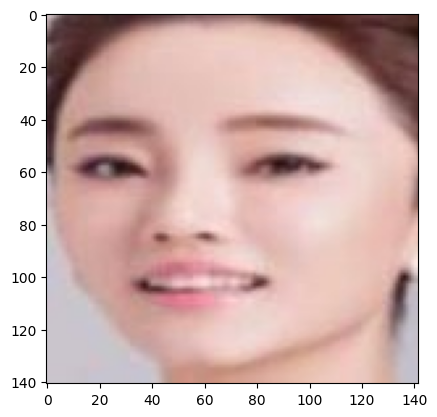

In [21]:
#displaying with mask images
img = mpimg.imread('/content/data/without_mask/without_mask_399.jpg')
imgplot = plt.imshow(img)
plt.show()

**Image Processing**

Resize the images

Convert the img to numpy arrays

In [22]:
with_mask_path = '/content/data/with_mask/'

data = []

for img_file in with_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)


with_mask_path = '/content/data/without_mask/'


for img_file in without_mask_files:

  image = Image.open(with_mask_path + img_file)
  image = image.resize((128,128))
  image = image.convert('RGB')
  image = np.array(image)
  data.append(image)

/usr/local/lib/python3.10/dist-packages/PIL/Image.py:996: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [23]:
len(data)

7553

In [24]:
#converting image list and label list to numpy arrays

X = np.array(data)
Y = np.array(labels)

In [25]:
type(X)

numpy.ndarray

In [26]:
type(Y)

numpy.ndarray

In [27]:
print(X.shape)

(7553, 128, 128, 3)


Train Test Split

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [29]:
#Scaling the data

X_train_scaled = X_train/255

X_test_scaled = X_test/255

Building a CNN model

In [30]:
import tensorflow as tf
from tensorflow import keras

In [31]:
num_of_classes = 2

model = keras.Sequential()

model.add(keras.layers.Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(128,128,3)))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Conv2D(64, kernel_size=(3,3), activation='relu'))
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64, activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(num_of_classes, activation='sigmoid'))

In [32]:
#compile the neural network

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['acc'])

In [33]:
#training the neural network
history = model.fit(X_train_scaled, Y_train, validation_split=0.1, epochs=10)

Epoch 1/10
170/170 [==============================] - 15s 21ms/step - loss: 0.5443 - acc: 0.7578 - val_loss: 0.3222 - val_acc: 0.8661
Epoch 2/10
170/170 [==============================] - 3s 16ms/step - loss: 0.3245 - acc: 0.8692 - val_loss: 0.2664 - val_acc: 0.8876
Epoch 3/10
170/170 [==============================] - 3s 17ms/step - loss: 0.3016 - acc: 0.8878 - val_loss: 0.2625 - val_acc: 0.8942
Epoch 4/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2439 - acc: 0.9084 - val_loss: 0.2419 - val_acc: 0.9041
Epoch 5/10
170/170 [==============================] - 3s 17ms/step - loss: 0.2094 - acc: 0.9154 - val_loss: 0.2152 - val_acc: 0.9058
Epoch 6/10
170/170 [==============================] - 3s 16ms/step - loss: 0.1860 - acc: 0.9303 - val_loss: 0.2523 - val_acc: 0.8909
Epoch 7/10
170/170 [==============================] - 3s 16ms/step - loss: 0.1533 - acc: 0.9389 - val_loss: 0.2167 - val_acc: 0.9157
Epoch 8/10
170/170 [==============================] - 3s 19ms/step -

In [34]:
loss, accuracy = model.evaluate(X_test_scaled, Y_test)
print('Test Accuracy =', accuracy)

48/48 [==============================] - 1s 11ms/step - loss: 0.2052 - acc: 0.9265
Test Accuracy = 0.9265387058258057


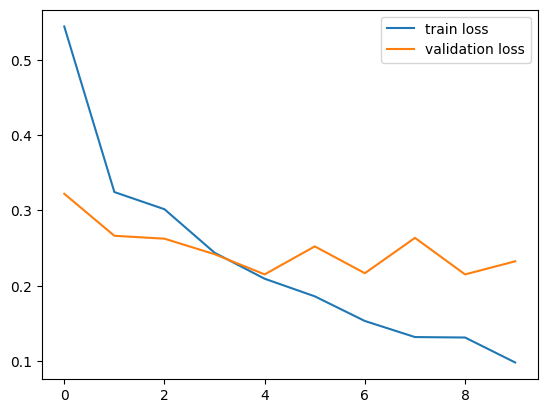

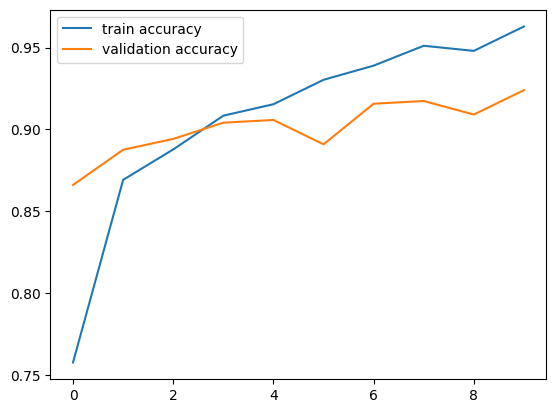

In [35]:
h = history

# plot the loss value
plt.plot(h.history['loss'], label='train loss')
plt.plot(h.history['val_loss'], label='validation loss')
plt.legend()
plt.show()

# plot the accuracy value
plt.plot(h.history['acc'], label='train accuracy')
plt.plot(h.history['val_acc'], label='validation accuracy')
plt.legend()
plt.show()

Path of the image to be predicted: /content/download.png


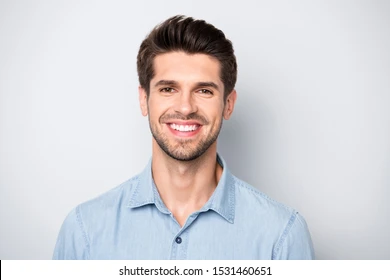

1/1 [==============================] - 0s 18ms/step
[[0.44938594 0.6042991 ]]
1
The person in the image is wearing the mask


In [44]:
input_image_path = input("Path of the image to be predicted: ")

input_image = cv2.imread(input_image_path)

cv2_imshow(input_image)

input_image_resized = cv2.resize(input_image, (128,128))

input_image_scaled = input_image_resized/255

input_image_reshaped = np.reshape(input_image_scaled, [1,128,128,3])

input_prediction = model.predict(input_image_reshaped)

print(input_prediction)

input_pred_label = np.argmax(input_prediction)

print(input_pred_label)

if input_pred_label == 1:
  print('The person in the image is wearing the mask')
else:
  print('The person in the image is not wearing the mask')